https://acleddata.com/2021/12/08/violence-targeting-women-in-politics-trends-in-targets-types-and-perpetrators-of-political-violence/

The project focuses on analyzing Political Violence Targeting Women (PVTW), a dataset that specifically identifies instances where women or girls are targeted due to their gender identity within the context of political violence. This dataset captures targeted violence against women regardless of their direct involvement in politics, encompassing a broad spectrum of incidents where gender is the primary reason for targeting.

Remark: PVTW does not cover all forms of political violence affecting women; it specifically excludes cases where gender is not the primary reason for targeting.

The objective of this project is to predict the number of events quarterly, specifically targeting the 3rd quarter of 2024, using data from the previous 12 months. 

Quarterly Prediction: Predict the number of events for the 3rd quarter of 2024 using historical data from the previous 12 months (from July 2023 to June 2024).

Data Preparation: Prepare your dataset (monthly_events.csv) which likely includes monthly counts of events over several years.

Sequence Data Preparation: Create sequences of data where each input sequence spans 12 months (1 year), and the corresponding output sequence is the number of events for the subsequent quarter.

Model Selection: Choose appropriate sequence prediction models such as LSTM (Long Short-Term Memory) networks, which are effective for learning from sequential data.

Training and Evaluation: Train your chosen model on historical data (up to June 2024) and evaluate its performance using appropriate metrics. Adjust the model as necessary based on validation results.

Prediction: Use the trained model to predict the number of events for the 3rd quarter of 2024 based on data from July 2023 to June 2024.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('gender_Jun21-1.csv')
# Convert 'event_date' to datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Extract year and month
df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month

# Group by year and month, and count the number of events
monthly_events = df.groupby(['year', 'month']).size().reset_index(name='num_events')
monthly_events = monthly_events.reset_index().rename(columns={'index': 'month'})
monthly_events.to_csv('./data/monthly_events.csv', index=False)


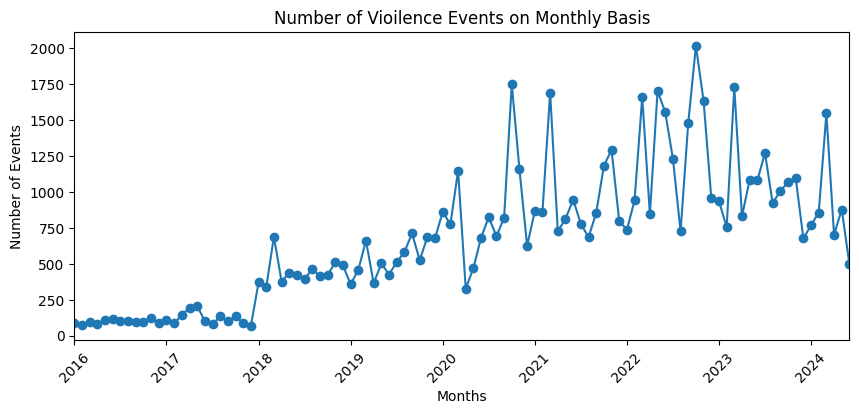

In [5]:
from matplotlib import pyplot as plt

# Plot the number of events per month
plt.figure(figsize=(10, 4))
monthly_events = monthly_events[monthly_events['year'] >= 2016].reset_index(drop=True)
plt.plot(monthly_events['num_events'], marker='o')

years = monthly_events['year'].unique()
year_ticks = [monthly_events[monthly_events['year'] == year].index[0] for year in years]
plt.xticks(year_ticks, years, rotation=45)
plt.xlabel('Months')
plt.xlim(0, len(monthly_events) - 1)
plt.ylabel('Number of Events')
plt.title('Number of Vioilence Events on Monthly Basis')
plt.savefig('./imgs/num_events_monthly.png')
plt.show()
